Implementando o algoritmo de retropropagação em Python



In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
'''
O Algoritmo de retropropagação é implementado através do dataset utilizado pelo UCI Dataset.
Link do Dataset:https://archive.ics.uci.edu/ml/datasets/banknote+authentication
'''

print("Carregamos o dataset do banco")
start_time = time.time()
#Definimos o dataset organizando sua lista através da função shuffle. 
dataset = shuffle(pd.read_csv("data_banknote_authentication.txt"))


Carregamos o dataset do banco


In [3]:
dataset

,3.6216,8.6661,-2.8073,-0.44699,0
180,-0.11783,-1.57890,8.03000,-0.028031,0
7,3.20320,5.75880,-0.75345,-0.612510,0
827,-2.59120,-0.10554,1.27980,1.041400,1
778,-1.81870,-9.03660,9.01620,-0.122430,1
1071,-1.36600,0.18416,0.90539,1.580600,1
...,...,...,...,...,...
324,4.45490,2.49760,1.03130,0.968940,0
31,4.29690,7.61700,-2.38740,-0.961640,0
72,4.16540,-3.44950,3.64300,1.087900,0
963,-1.41060,-7.10800,5.64540,0.313350,1


In [4]:
# Os nomes das colunas foram obtidos através do link do dataset.
dataset.columns = ["Variance of Wavelet Transformed image", "Skewness of Wavelet Transformed image",
                "Curtosis of Wavelet Transformed image", "Entropy of image","Class"]

# Alteramos os valores das classes para -1 e 1 para minha retropropagação
dataset.loc[dataset['Class'] == 1, 'Class'] = -1
dataset.loc[dataset['Class'] == 0, 'Class'] = 1
x = dataset[["Variance of Wavelet Transformed image","Skewness of Wavelet Transformed image","Curtosis of Wavelet Transformed image","Entropy of image"]]
y = dataset[['Class']]

dataset

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Class
180,-0.11783,-1.57890,8.03000,-0.028031,1
7,3.20320,5.75880,-0.75345,-0.612510,1
827,-2.59120,-0.10554,1.27980,1.041400,-1
778,-1.81870,-9.03660,9.01620,-0.122430,-1
1071,-1.36600,0.18416,0.90539,1.580600,-1
...,...,...,...,...,...
324,4.45490,2.49760,1.03130,0.968940,1
31,4.29690,7.61700,-2.38740,-0.961640,1
72,4.16540,-3.44950,3.64300,1.087900,1
963,-1.41060,-7.10800,5.64540,0.313350,-1


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=4)
print('Shape of X_Train : ', x_train.shape)
print('Shape of Train class : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Test class : ', y_test.shape)


Shape of X_Train :  (1096, 4)
Shape of Train class :  (1096, 1)
Shape of X_test :  (275, 4)
Shape of Test class :  (275, 1)


In [6]:
# Normalizando o uso de dados com Standard Scaler e Fit Transform
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

# Convertendo pd dataframe para array do numpy verificando a compatibilidade
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time

print("Tempo e custo para pré-processamento e leitura do conjunto de dados: %f seconds \n " % total_time)

Tempo e custo para pré-processamento e leitura do conjunto de dados: 0.098868 seconds 
 


In [7]:
# Hyperbolic Tangent Activation função
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)



In [14]:

print("............... Inicialização de Parametros ................")
start_time = time.time()
# Configurando Hyper parametros
np.random.seed(10)
inp = 4
hd = 6
out = 1

actual_out_size = y_train.size
epochs = 10000
eta = 0.0004
alpha = 0.7
print("............... Configuração de 4 camadas ocultas ................")
# Configuração de 4 camadas ocultas
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)


acc_list = []

end_time = time.time()
total_time = end_time - start_time
print("Tempo de custo para configuração de HyperParameters: %f seconds \n " %total_time)

............... Inicialização de Parametros ................
............... Configuração de 4 camadas ocultas ................
Tempo de custo para configuração de HyperParameters: 0.000000 seconds 
 


Aplicação dos Ajustes de Parâmetros no Algoritmo

............... Treinando o algoritmo de retropropagação  ................
Precisão do treinamento: 90.0 %
Custo do tempo para treinamento do algoritmo: 21.036185 seconds 
 
............... Gerando o gráfico da curva de Acerto ................


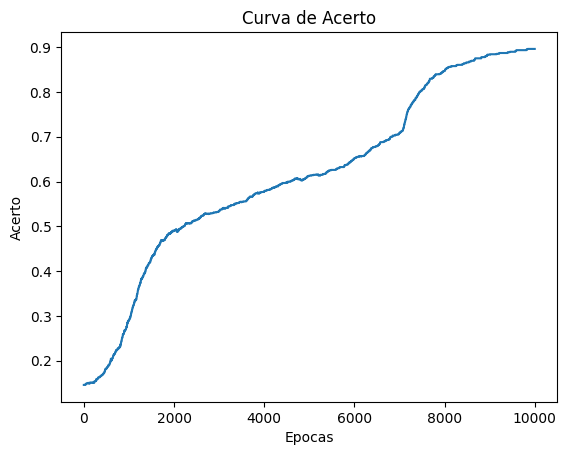

In [15]:
print("............... Treinando o algoritmo de retropropagação  ................")
start_time = time.time()
for i in range(epochs):
    # Propagação para frente para 4 camadas
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    # Calculando a precisão (Quantos acertou pelo total de itens)
    final_out = final_out.round()
    calc_acc = (final_out == y_train).sum()
    acc = calc_acc / actual_out_size
    acc_list.append(acc)

    # Retropropagação de 4 camadas
    final_err = final_out - y_train
    final_sigmoid_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_sigmoid_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)


    # Divide weights as per size of output
    output_weights = np.dot(l4_out.T, final_sigmoid_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

print("Precisão do treinamento: "+str(round(acc_list[-1],2) * 100) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Custo do tempo para treinamento do algoritmo: %f seconds \n " %total_time)

print("............... Gerando o gráfico da curva de Acerto ................")

plt.title("Curva de Acerto")
plt.ylabel("Acerto")
plt.xlabel("Epocas")
plt.plot(acc_list)
plt.show()



Analisando os Resultados



In [10]:
print()
print("............... Teste de retropropagação ................")
start_time = time.time()

# Feedforward for 4 hidden layers by calling activation function
l1_test = np.dot(x_test, w1_l1)
l1_out_test = hyperbolic_tanh(l1_test)

l2_test = np.dot(l1_out_test, w2_l2)
l2_out_test = hyperbolic_tanh(l2_test)

l3_test = np.dot(l2_out_test, w3_l3)
l3_out = hyperbolic_tanh(l3_test)

l4_test = np.dot(l3_out, w4_l4)
l4_out_test = hyperbolic_tanh(l4_test)

output_test = np.dot(l4_out_test, out_w)
final_out_test = hyperbolic_tanh(output_test)

# Calculate accuracy
actual_out_size = y_test.size
final_out_test_acc = final_out_test.round()
calc_acc = (final_out_test_acc == y_test).sum()
acc_test = (calc_acc/ actual_out_size) * 100



print("Testing Accuracy: "+str(round(acc_test,2)) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " %total_time)

print(final_out_test)


............... Teste de retropropagação ................
Testing Accuracy: 63.27 %
Time Cost for Testing algorithm: 0.000000 seconds 
 
[[-0.62103407]
 [ 0.23550137]
 [ 0.50531123]
 [-0.41900715]
 [ 0.57546738]
 [-0.96182276]
 [ 0.79137367]
 [ 0.95341099]
 [ 0.95851993]
 [ 0.95921877]
 [-0.92837567]
 [-0.96466079]
 [-0.95732484]
 [-0.73062712]
 [-0.96880257]
 [ 0.96436653]
 [-0.30984781]
 [-0.61688824]
 [ 0.88066945]
 [ 0.89078503]
 [ 0.47384575]
 [ 0.28788841]
 [-0.93869843]
 [ 0.90423013]
 [ 0.40603253]
 [ 0.81870667]
 [ 0.28874268]
 [ 0.36483039]
 [ 0.43687683]
 [ 0.96197306]
 [ 0.85132436]
 [-0.95105614]
 [ 0.94484272]
 [-0.7803919 ]
 [-0.96308304]
 [-0.88642885]
 [ 0.39052511]
 [-0.08180006]
 [-0.94721717]
 [ 0.18603212]
 [-0.96257227]
 [-0.14823173]
 [-0.85256248]
 [ 0.92223612]
 [-0.37834928]
 [ 0.69308381]
 [-0.7843765 ]
 [ 0.95847744]
 [ 0.12868517]
 [ 0.96045888]
 [ 0.94474252]
 [ 0.88296059]
 [-0.95915777]
 [ 0.16029076]
 [-0.08997606]
 [ 0.86993798]
 [-0.49477907]
 [ 0.92